# ManiSkill2 Tutorial: Advanced Rendering

ManiSkill2 supports advanced rendering techniques:
- ray tracing
- stereo depth

In [1]:
%matplotlib inline 

import sys

import gym
import matplotlib.pyplot as plt
import numpy as np

# Register ManiSkill2 environments in gym
import mani_skill2.envs

def plot_img(img, title=None):
    plt.figure(figsize=(10,6))
    if title is not None:
        plt.title(title)
    plt.imshow(img)

## Ray tracing

Note that ray tracing is only supported for NVIDIA RTX GPU with driver version >= 522. (driver version >=470 should work, but not officially supported.)

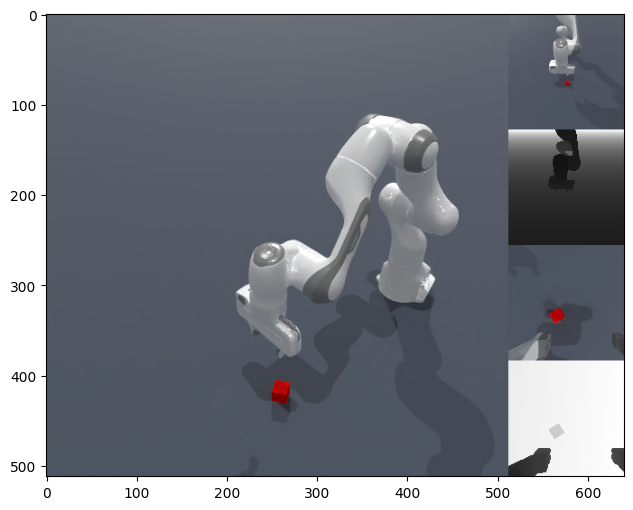

In [2]:
# Enable ray tracing
env = gym.make("PickCube-v0", shader_dir="rt")
plot_img(env.render("cameras"))
env.close()
del env

The configuration of ray tracing can be set through `render_config`. Please refer to the source code of `mani_skill2.envs.sapien_env::BaseEnv` and <https://sapien.ucsd.edu/docs/latest/tutorial/rendering/raytracing_renderer.html> for  details.

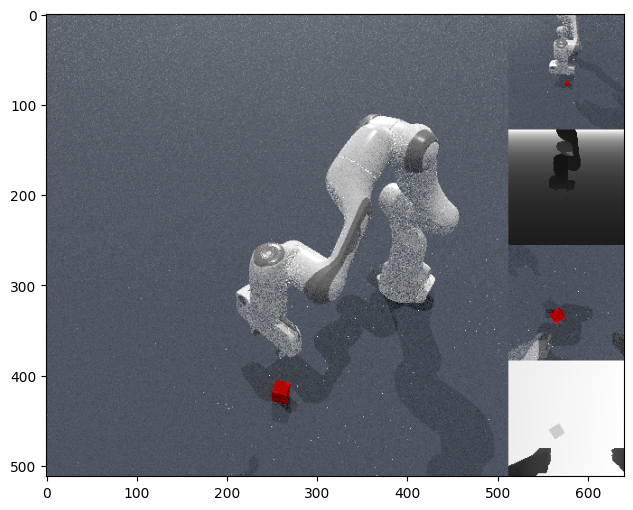

In [3]:
env = gym.make(
    "PickCube-v0",
    shader_dir="rt",
    # The default is {"rt_samples_per_pixel": 32, "rt_use_denoiser": True}
    render_config={"rt_samples_per_pixel": 2, "rt_use_denoiser": False},
)
plot_img(env.render("cameras"))
env.close()
del env

## Realistic Stereo Depth

ManiSkill2 can provide realistic stereo depth supported by SAPIEN. SAPIEN is integrated with a real-time active stereo sensor simulation pipeline that will produce depth similar to real-world depth sensors. Please see <https://sapien.ucsd.edu/docs/latest/tutorial/rendering/depth_sensor.html> for details.

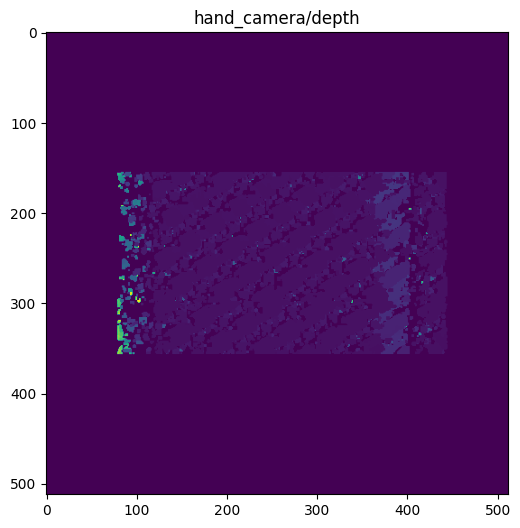

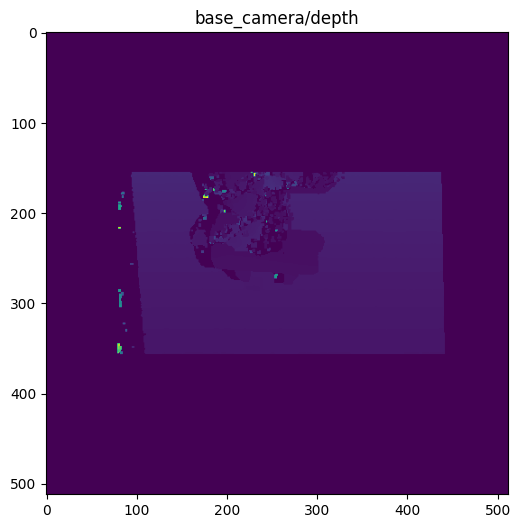

In [4]:
# Enable stereo depth
env = gym.make(
    "PickCube-v0",
    obs_mode="rgbd",
    shader_dir="rt",
    camera_cfgs={"use_stereo_depth": True, "height": 512, "width": 512},
)
obs = env.reset()
plot_img(obs["image"]["hand_camera"]["depth"], title="hand_camera/depth")
plot_img(obs["image"]["base_camera"]["depth"], title="base_camera/depth")
env.close()
del env

In [5]:
# Enable stereo depth
env = gym.make(
    "PickCube-v0",
    obs_mode="pointcloud",
    shader_dir="rt",
    camera_cfgs={"use_stereo_depth": True, "height": 512, "width": 512},
)
obs = env.reset()
env.close()
del env

import trimesh
v = obs['pointcloud']['xyzw'][...,:3]
m = obs['pointcloud']['xyzw'][..., 3] > 0
rgb = obs['pointcloud']['rgb']
s= trimesh.Scene([trimesh.points.PointCloud(v[m], rgb[m])])
s.show()